In [62]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## A $\vec{v}$ = $\lambda$ $\vec{v}$

here A is a matrix that transforms your orginal co-ordinate space by rotating it, flipping it etc. <br />
$\lambda$ is the magical scalar value that brings about the same effect as matrix multiplication of A with $\vec{v}$

This can be similified when running calcualtions:<br />
A $\vec{v}$ = $\lambda$ I $\vec{v}$  <br />
I is identity matrix that coverts scalar into a mxn matrix of same size as A<br />

Then we bring over everything to left hand side to solve it<br />
A $\vec{v}$ - $\lambda$ I $\vec{v}$ = 0 <br />
(A - $\lambda$ I) $\vec{v}$ = 0

Since we dont know both $\lambda$ &  $\vec{v}$, we first derive $\lambda$ by taking determinat of the A-$\lambda$ I

### Step 1:
Get characteristic polynomial equation by solving determinant(A - $\lambda$ I),<br />
once you solve it you will get something like <br />

det(A - $\lambda$ I) =  a $\lambda$**3 + b $\lambda$**2 + c $\lambda$ +0 = 0

### Step 2:
Get roots of your polynomial

 $\lambda$ = (b+-sqrt(b**2-4ac))/2a​


this will give you $\lambda1$, $\lambda2$, $\lambda3$ values

In [ ]:
A = np.array([[1, 2, 3],
              [2, 4, 4],
              [3, 6, 1]])

eigvals = np.linalg.eigvals(A)
print("Eigenvalues:", eigvals)
# output: Eigenvalues: [ 9.08276253e+00  5.64327231e-17 -3.08276253e+00]
# The eigenvalues above give you an idea of search space to use below

# det(A - lambda * np.eye(3)) = 0
# we find value of lambda that makes the determinant zero we can get roots numerically by solving the characteristic polynomial
coeffs = np.poly(A)
print("Coefficients of the characteristic polynomial:", coeffs)
roots = np.roots(coeffs)
print("Roots of the characteristic polynomial:", roots)

Eigenvalues: [ 9.08276253e+00  5.64327231e-17 -3.08276253e+00]
Coefficients of the characteristic polynomial: [ 1.00000000e+00 -6.00000000e+00 -2.80000000e+01  1.58011625e-15]
Roots of the characteristic polynomial: [ 9.08276253e+00 -3.08276253e+00  5.64327231e-17]


#### $\lambda1$ = 9.082762530298218
#### $\lambda2$ = -3.0827625302982193
#### $\lambda3$ = 0

Now that we have eigenvalues, we can substitute them into (A-$\lambda$I) <br />
to get eigenvectors <br/>
(A- $\lambda$ I) $\vec{v}$ = 0

In [68]:
_, eigvacs = np.linalg.eig(A)
print("Eigenvectors:\n", eigvacs)
# Now we can find eigenvectors for each eigenvalue, keep in mind you need double precision for this to work well
lmbda1 = 9.082762530298218
M1 = A - lmbda1 * np.eye(3)
ns1 = null_space(M1)
v1 = ns1[:, 0]
v1 = v1/np.linalg.norm(v1)
print("Eigenvector for lambda1:\n", v1)
lmbda2 = -3.0827625302982193
M2 = A - lmbda2 * np.eye(3)
ns2 = null_space(M2)
v2 = ns2[:, 0]
v2 = v2/np.linalg.norm(v2)
print("Eigenvector for lambda2:\n", v2)
lmbda3 = 0
M3 = A - lmbda3 * np.eye(3)
ns3 = null_space(M3)
v3 = ns3[:, 0]
v3 = v3/np.linalg.norm(v3)
print("Eigenvector for lambda3:\n", v3)
# Note: The eigenvectors returned may differ in scale or sign from those obtained via np.linalg.eig due to the nature of null space computation.

Eigenvectors:
 [[-3.99594133e-01 -8.94427191e-01 -4.40846982e-01]
 [-6.58838320e-01  4.47213595e-01 -3.43773657e-01]
 [-6.37382615e-01 -7.61773332e-17  8.29140284e-01]]
Eigenvector for lambda1:
 [0.39959413 0.65883832 0.63738261]
Eigenvector for lambda2:
 [ 0.44084698  0.34377366 -0.82914028]
Eigenvector for lambda3:
 [ 8.94427191e-01 -4.47213595e-01  2.77555756e-16]


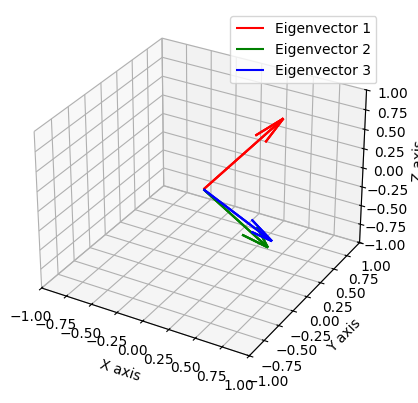

In [ ]:
#plot of the eig vectors in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
ax.quiver(*origin, v1[0], v1[1], v1[2], color='r', label='Eigenvector 1')
ax.quiver(*origin, v2[0], v2[1], v2[2], color='g', label='Eigenvector 2')
ax.quiver(*origin, v3[0], v3[1], v3[2], color='b', label='Eigenvector 3')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()